In [2]:

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import Pipeline
import nltk
import nltk.corpus 
from nltk.tokenize import word_tokenize
from gensim.models.word2vec import Word2Vec
import seaborn as sns

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
trainFile = 'train.tsv'
testFile = 'test.tsv'
valFile = 'valid.tsv'

# add header to all three datasets
traindata = pd.read_csv(trainFile, delimiter='\t', encoding='utf-8', names=
                        ["json ID", "label", "statement", "subject", "speaker", "job title", "state", "party",
                         "barely true", "false", "half true", "mostly true", "pants on fire", "los", "justification"])

testdata = pd.read_csv(testFile, delimiter='\t', encoding='utf-8', names=
                        ["json ID", "label", "statement", "subject", "speaker", "job title", "state", "party",
                         "barely true", "false", "half true", "mostly true", "pants on fire", "los", "justification"])

valdata = pd.read_csv(valFile, delimiter='\t', encoding='utf-8', names=
                        ["json ID", "label", "statement", "subject", "speaker", "job title", "state", "party",
                         "barely true", "false", "half true", "mostly true", "pants on fire", "los", "justification"])

In [4]:
print(traindata.label)
print(traindata.shape)


0              false
1          half-true
2        mostly-true
3              false
4          half-true
            ...     
10235    mostly-true
10236    mostly-true
10237      half-true
10238          false
10239     pants-fire
Name: label, Length: 10240, dtype: object
(10240, 15)


<AxesSubplot:xlabel='label', ylabel='count'>

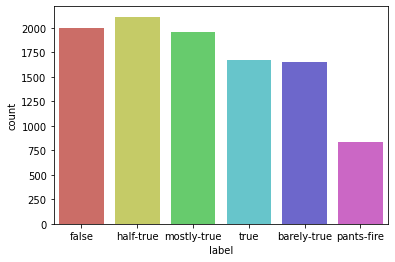

In [5]:
sns.countplot(x='label', data=traindata, palette='hls')

In [6]:
Label=[]
Statement=[]
for i in traindata.label:
    if i=='false':
        la='false'
    if i=='half-true':
        la='true'
    if i=='barely-true':
        la='false'
    if i=='mostly-true':
        la='true'
    if i=='pants-fire':
        la='false'
    if i=='true':
        la='true'
    if i=='original':
        la='true'
    Label.append(la)
for i in traindata.statement:
    Statement.append(i)
print(len(Label))
print(len(Statement))

10240
10240


In [7]:
Label=[]
Statement=[]
for i in testdata.label:
    if i=='false':
        la='false'
    if i=='half-true':
        la='true'
    if i=='barely-true':
        la='false'
    if i=='mostly-true':
        la='true'
    if i=='pants-fire':
        la='false'
    if i=='true':
        la='true'
    if i=='original':
        la='true'
    Label.append(la)
for i in testdata.statement:
    Statement.append(i)
print(len(Label))
print(len(Statement))

1267
1267


In [8]:
Label=[]
Statement=[]
for i in valdata.label:
    if i=='false':
        la='false'
    if i=='half-true':
        la='true'
    if i=='barely-true':
        la='false'
    if i=='mostly-true':
        la='true'
    if i=='pants-fire':
        la='false'
    if i=='true':
        la='true'
    if i=='original':
        la='true'
    Label.append(la)
for i in valdata.statement:
    Statement.append(i)
print(len(Label))
print(len(Statement))

1284
1284


In [9]:
test_filename = 'test.csv'
train_filename = 'train.csv'
valid_filename = 'valid.csv'

train_news = pd.read_csv(train_filename)
test_news = pd.read_csv(test_filename)
valid_news = pd.read_csv(valid_filename)
train_news = train_news.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
test_news = train_news.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
valid_news = train_news.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [10]:
print(train_news.shape)
print(test_news.shape)
print(valid_news.shape)

(10240, 2)
(10240, 2)
(10240, 2)


<AxesSubplot:xlabel='Label', ylabel='count'>

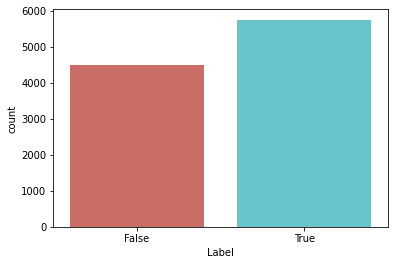

In [11]:
sns.countplot(x='Label', data=train_news, palette='hls')

<AxesSubplot:xlabel='Label', ylabel='count'>

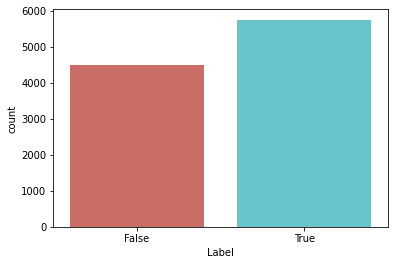

In [12]:
sns.countplot(x='Label', data=test_news, palette='hls')

<AxesSubplot:xlabel='Label', ylabel='count'>

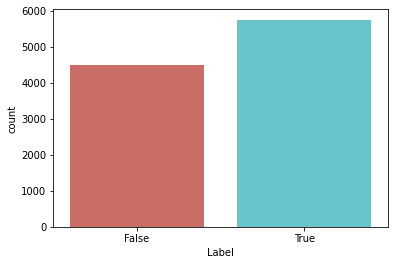

In [13]:
sns.countplot(x='Label', data=valid_news, palette='hls')

In [14]:
def check_missLabel(dataset):
#   dataset.info()
  print("Missing label values in {} are {}".format(dataset.Statement,dataset['Label'].isnull().sum()))
  print("----------------------------------------------------------------")
check_missLabel(train_news)
check_missLabel(test_news)
check_missLabel(valid_news)

Missing label values in 0        Says the Annies List political group supports ...
1        When did the decline of coal start? It started...
2        Hillary Clinton agrees with John McCain "by vo...
3        Health care reform legislation is likely to ma...
4        The economic turnaround started at the end of ...
                               ...                        
10235    There are a larger number of shark attacks in ...
10236    Democrats have now become the party of the [At...
10237    Says an alternative to Social Security that op...
10238    On lifting the U.S. Cuban embargo and allowing...
10239    The Department of Veterans Affairs has a manua...
Name: Statement, Length: 10240, dtype: object are 0
----------------------------------------------------------------
Missing label values in 0        Says the Annies List political group supports ...
1        When did the decline of coal start? It started...
2        Hillary Clinton agrees with John McCain "by vo...
3        

In [15]:
countV = CountVectorizer()
train_count = countV.fit_transform(train_news['Statement'].values)

print(countV)
print(countV.vocabulary_)
print(train_count)

CountVectorizer()


{'says': 9676, 'the': 10988, 'annies': 1044, 'list': 6639, 'political': 8376, 'group': 5115, 'supports': 10709, 'third': 11036, 'trimester': 11296, 'abortions': 615, 'on': 7728, 'demand': 3278, 'when': 11934, 'did': 3434, 'decline': 3185, 'of': 7672, 'coal': 2475, 'start': 10425, 'it': 6052, 'started': 10426, 'natural': 7418, 'gas': 4860, 'took': 11138, 'off': 7674, 'that': 10980, 'to': 11110, 'begin': 1532, 'in': 5687, 'president': 8554, 'george': 4910, 'bushs': 1964, 'administration': 751, 'hillary': 5401, 'clinton': 2444, 'agrees': 856, 'with': 12027, 'john': 6133, 'mccain': 6967, 'by': 1989, 'voting': 11748, 'give': 4954, 'bush': 1962, 'benefit': 1569, 'doubt': 3684, 'iran': 5999, 'health': 5310, 'care': 2096, 'reform': 9099, 'legislation': 6502, 'is': 6014, 'likely': 6605, 'mandate': 6834, 'free': 4735, 'sex': 9923, 'change': 2256, 'surgeries': 10721, 'economic': 3842, 'turnaround': 11351, 'at': 1259, 'end': 3990, 'my': 7374, 'term': 10939, 'chicago': 2313, 'bears': 1506, 'have': 

  (0, 9676)	1
  (0, 10988)	1
  (0, 1044)	1
  (0, 6639)	1
  (0, 8376)	1
  (0, 5115)	1
  (0, 10709)	1
  (0, 11036)	1
  (0, 11296)	1
  (0, 615)	1
  (0, 7728)	1
  (0, 3278)	1
  (1, 10988)	1
  (1, 11934)	2
  (1, 3434)	1
  (1, 3185)	1
  (1, 7672)	1
  (1, 2475)	1
  (1, 10425)	1
  (1, 6052)	1
  (1, 10426)	2
  (1, 7418)	1
  (1, 4860)	1
  (1, 11138)	1
  (1, 7674)	1
  :	:
  (10239, 10988)	1
  (10239, 7672)	2
  (10239, 11110)	2
  (10239, 5267)	1
  (10239, 7828)	1
  (10239, 7824)	1
  (10239, 1159)	1
  (10239, 12151)	2
  (10239, 6327)	1
  (10239, 6603)	1
  (10239, 11013)	1
  (10239, 11004)	1
  (10239, 3309)	1
  (10239, 12158)	1
  (10239, 11660)	2
  (10239, 799)	1
  (10239, 2568)	1
  (10239, 11622)	1
  (10239, 2549)	1
  (10239, 10660)	1
  (10239, 8996)	1
  (10239, 10918)	1
  (10239, 3989)	1
  (10239, 10594)	1
  (10239, 6853)	1


In [16]:
training_set = pd.concat([train_news, valid_news], ignore_index=True)
print('Training set size: {}'.format(training_set.shape))
training_set.sample(5)

Training set size: (20480, 2)


,Statement,Label
11876,"Last year, (Bill McCollum) spent more than $2....",True
9551,A private company building a natural gas pipel...,True
13406,There are places in America that are among the...,False
14893,"By 2014, there will be one administrator for e...",True
16388,57% of the jobs created in Austin from 2009 to...,True


In [17]:
from nltk.corpus import stopwords
stopwords_list = list(stopwords.words('english'))
tfidf_V = TfidfVectorizer(stop_words=stopwords_list, use_idf=True, smooth_idf=True)
train_count = tfidf_V.fit_transform(training_set['Statement'].values)

In [18]:
tfidf_V.vocabulary_

{'says': 9587,
 'annies': 1035,
 'list': 6575,
 'political': 8289,
 'group': 5075,
 'supports': 10614,
 'third': 10931,
 'trimester': 11186,
 'abortions': 615,
 'demand': 3252,
 'decline': 3159,
 'coal': 2450,
 'start': 10331,
 'started': 10332,
 'natural': 7348,
 'gas': 4820,
 'took': 11028,
 'begin': 1514,
 'president': 8467,
 'george': 4870,
 'bushs': 1942,
 'administration': 749,
 'hillary': 5350,
 'clinton': 2419,
 'agrees': 851,
 'john': 6070,
 'mccain': 6902,
 'voting': 11633,
 'give': 4914,
 'bush': 1940,
 'benefit': 1549,
 'doubt': 3651,
 'iran': 5941,
 'health': 5263,
 'care': 2071,
 'reform': 9011,
 'legislation': 6438,
 'likely': 6541,
 'mandate': 6769,
 'free': 4697,
 'sex': 9834,
 'change': 2231,
 'surgeries': 10626,
 'economic': 3806,
 'turnaround': 11241,
 'end': 3954,
 'term': 10844,
 'chicago': 2288,
 'bears': 1491,
 'starting': 10334,
 'quarterbacks': 8752,
 'last': 6353,
 '10': 21,
 'years': 12006,
 'total': 11046,
 'number': 7522,
 'tenured': 10843,
 'uw': 11481,
 

In [19]:
def show_eval_scores(model, test_set, model_name):
    
    y_pred = model.predict(test_set['Statement'])
    y_true = test_set['Label']
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)

    print('Report for ---> {}'.format(model_name))
    print('Accuracy is: {}'.format(accuracy))
    print('F1 score is: {}'.format(f1))
    print('Precision score is: {}'.format(precision))
    print('Recall score is: {}'.format(recall))

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, f1_score, precision_score,
                             recall_score)
from sklearn.model_selection import (GridSearchCV, KFold, RandomizedSearchCV,
                                     learning_curve)
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
lr_pipeline = Pipeline([
    ('lr_TF', TfidfVectorizer(stop_words=stopwords_list, use_idf=True, smooth_idf=True)),
    ('lr_clf', LogisticRegression(random_state=42, n_jobs=-1))
])

In [21]:
lr_pipeline = Pipeline([
    ('lr_TF', TfidfVectorizer(lowercase=False, ngram_range=(1, 5), stop_words=stopwords_list, use_idf=True, smooth_idf=True)),
    ('lr_clf', LogisticRegression(C=1.0, random_state=42, n_jobs=-1))
])

In [22]:

lr_pipeline.fit(training_set['Statement'], training_set['Label'])

Pipeline(steps=[('lr_TF',
                 TfidfVectorizer(lowercase=False, ngram_range=(1, 5),
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('lr_clf', LogisticRegression(n_jobs=-1, random_state=42))])

In [23]:

show_eval_scores(lr_pipeline, test_news, 'Logistic Regression TFIDF Vectorizer')

Report for ---> Logistic Regression TFIDF Vectorizer
Accuracy is: 0.99296875
F1 score is: 0.9937705485378093
Precision score is: 0.9891491560454702
Recall score is: 0.9984353268428373


In [24]:
svm_pipeline = Pipeline([
    ('svm_TF', TfidfVectorizer(lowercase=True, ngram_range=(1, 2), stop_words=stopwords_list, use_idf=True, smooth_idf=True)),
    ('svm_clf', SVC(gamma=0.2, kernel='rbf', random_state=42))
])

In [ ]:
svm_pipeline.fit(training_set['Statement'], training_set['Label'])

In [ ]:
show_eval_scores(svm_pipeline, test_news, 'SVM Classifier TFIDF Vectorizer')

In [ ]:
filename = 'svm_model.sav'
import joblib
joblib.dump(svm_pipeline, filename)
print('train complete')

In [ ]:
print(training_set['Statement'])
f = open("demofile3.txt", "w")
f.write(training_set['Statement'])
f.close()

In [ ]:
val='The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.'
a=[]
svm_pipeline=joblib.load('svm_model.sav')
a.append(val)
print(svm_pipeline.predict(a))